In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

import glob
import os
# os.system('ls')

## 1 Check formatting and visualize data 

In [2]:
# Check header
data = pd.read_csv('smooth_AgRP_DIOFP1_fp_base_chow_210902_2.csv', delimiter=',')
data.head()

,# time,smoothGCAMP,smoothISOS,smoothfitISOS,smoothdFF
0,0.020644,44.223747,35.985706,-7.004587,-731.354116
1,1.020395,94.602989,78.538265,95.882191,-1.334139
2,2.020147,100.217934,85.174839,111.928598,-10.462621
3,3.019899,100.910030,85.213947,112.023157,-9.920384
4,4.019650,101.247643,85.029293,111.576686,-9.257349


In [3]:
# Check for unexpected spaces in column titles
data.columns

Index(['# time', 'smoothGCAMP', 'smoothISOS', 'smoothfitISOS', 'smoothdFF'], dtype='object')

In [ ]:
eyfp_files = np.sort(glob.glob('*eyfp_*.csv'))
chow_files = np.sort(glob.glob('*chow_*.csv'))
hfd_files  = np.sort(glob.glob('*hfd_*.csv'))

for file in eyfp_files:
    file.set_index('# time')
    eyfp_mean = file.smoothdFF.mean()
    eyfp_std = np.std(file[['smoothdFF']],axis=1)
    plt.plot()
    
    
    
    
    
    
    
    
    
   


In [4]:
# sort files by group
eyfp = []
chow = []
hfd = []

eyfp_files = np.sort(glob.glob('*eyfp_*.csv'))
chow_files = np.sort(glob.glob('*chow_*.csv'))
hfd_files  = np.sort(glob.glob('*hfd_*.csv'))

for file in eyfp_files:
    eyfp.append(pd.read_csv(file))
    eyfp[-1] = eyfp[-1].set_index('# time')
   
for file in chow_files:
    chow.append(pd.read_csv(file))
    chow[-1] = chow[-1].set_index('# time')
  
for file in hfd_files:
    hfd.append(pd.read_csv(file))
    hfd[-1] = hfd[-1].set_index('# time')  

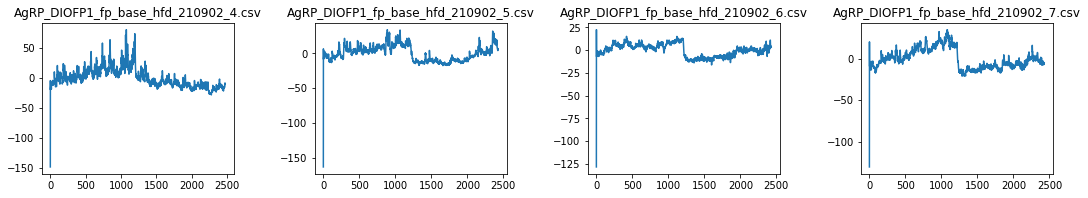

In [63]:
# HFD GROUP: visualize 405 and 465 signals and dFF
plt.figure(figsize=(30,20))
for i in range(len(hfd)):
    plt.subplot(8,8,i+1)
    plt.plot(hfd[i].smoothdFF)
    # plt.plot(hfd[i]['smoothGCAMP'])
    # plt.plot(hfd[i].smoothISOS)
#     plt.axis('off')
    # plt.ylim(-25,50)
    plt.title(hfd_files[i][7:50]) 
#     ax.axes.xaxis.set_visible(False)
plt.savefig("figures/raw_data_fp.svg")

plt.tight_layout();  

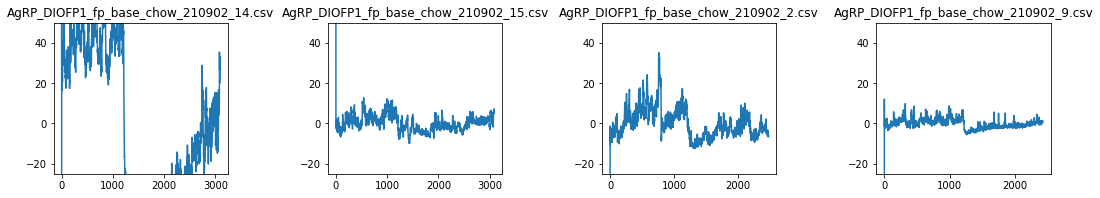

In [65]:
# CHOW GROUP: visualize 405 and 465 signals and dFF
 
plt.figure(figsize=(30,20))
for i in range(len(chow)):
    plt.subplot(8,8,i+1)
    # print(hfd[i])
    plt.plot(chow[i].smoothdFF)
    # plt.plot(chow[i].smoothGCAMP)
    # plt.plot(chow[i].smoothISOS)
#     plt.axis('off')
    plt.ylim(-25,50)
    # plt.xticks([])
    plt.title(chow_files[i][7:50])
#     ax.axes.xaxis.set_visible(False)
plt.savefig("figures/raw_data_fp.svg")

plt.tight_layout();  

In [14]:
eyfp[['smoothdFF']]

TypeError: list indices must be integers or slices, not list

In [ ]:
# sort files by group
eyfp = []
chow = []
hfd = []

for i in eyfp:
    eyfp['smoothdFF'].mean()

for file in eyfp_files:
    eyfp.append(pd.read_csv(file))
    eyfp[-1] = eyfp[-1].set_index('# time')
   
for file in chow_files:
    chow.append(pd.read_csv(file))
    chow[-1] = chow[-1].set_index('# time')
  
for file in hfd_files:
    hfd.append(pd.read_csv(file))
    hfd[-1] = hfd[-1].set_index('# time')  

In [84]:
# Define some useful functions

eyfp = []
chow = []
hfd = []

eyfp_files = np.sort(glob.glob('*eyfp_*.csv'))
chow_files = np.sort(glob.glob('*chow_*.csv'))
hfd_files  = np.sort(glob.glob('*hfd_*.csv'))

for file in eyfp_files:
    eyfp.append(pd.read_csv(file))
    eyfp[-1] = eyfp[-1].set_index('# time')
    mean = eyfp.mean(axis=1)
    sem_plus = mean + scipy.stats.sem(eyfp, axis=1)
    sem_minus = mean - scipy.stats.sem(eyfp, axis=1)
    plt.fill_between(np.arange(mean.shape[0]), sem_plus, sem_minus, alpha=0.5)
    plt.plot(mean)

# plot
fig, ax = plt.subplots()

ax.fill_between(chow['#time'], y1, y2, alpha=.5, linewidth=0)

ax.plot(chow[i]['# time'], chow[i]['smoothdFF'].mean(), linewidth=2)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()





     
for file in chow_files:
    chow.append(pd.read_csv(file))
    chow[-1] = chow[-1].set_index('# time')
    mean = chow.mean(axis=1)
    sem_plus = mean + scipy.stats.sem(chow, axis=1)
    sem_minus = mean - scipy.stats.sem(chow, axis=1)
    plt.fill_between(np.arange(mean.shape[0]), sem_plus, sem_minus, alpha=0.5)
    plt.plot(mean)
  
for file in hfd_files:
    hfd.append(pd.read_csv(file))
    hfd[-1] = hfd[-1].set_index('# time')  
    mean = hfd.mean(axis=1)
    sem_plus = mean + scipy.stats.sem(hfd, axis=1)
    sem_minus = mean - scipy.stats.sem(hfd, axis=1)
    plt.fill_between(np.arange(mean.shape[0]), sem_plus, sem_minus, alpha=0.5)
    plt.plot(mean)


AttributeError: 'list' object has no attribute 'mean'

In [11]:
import seaborn as sns

sns.set()

mean_chow = np.mean(chow)
std_chow = np.std(chow)

# mean_hfd = 
# std_hfd = 

# mean_eyfp = 
# std_eyfp = 

x = np.arange(len(chow))
# plt.plot(x, mean_eyfp, 'g-', label='eyfp')
# plt.fill_between(x, mean_eyfp - std_eyfp, mean_eyfp + std_eyfp, color='g', alpha=0.2)

plt.plot(x, mean_chow, 'r--', label='chow')
plt.fill_between(x, mean_chow - std_chow, mean_chow + std_chow, color='r', alpha=0.2)
plt.xticks[[]]

# plt.plot(x, mean_hfd, 'b--', label='hfd')
# plt.fill_between(x, mean_hfd - std_hfd, mean_hfd + std_hfd, color='b', alpha=0.2)

plt.legend(title='baseline food intake response')
plt.show()

/Users/jenniferdeem/opt/anaconda3/envs/py_37/lib/python3.7/site-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)
/Users/jenniferdeem/opt/anaconda3/envs/py_37/lib/python3.7/site-packages/numpy/core/_methods.py:197: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


TypeError: loop of ufunc does not support argument 0 of type DataFrame which has no callable conjugate method

In [73]:
# for each group, align dFF from i+10 to 2000, calculate mean, sem, plot

def visualize_group(group):
    if group == eyfp:
        plt.figure(figsize=(30,20))
        for i in range(len(eyfp)):
            plt.plot(eyfp[i]['smoothdFF'][10:2000].mean())
            plt.xticks([])
            plt.ylim(-30,30)
        return eyfp.head(5)   
    
    if group == hfd:
        plt.figure(figsize=(30,20))
        hfd_ave = pd.append(pd.DataFrame(data=hfd_files,index=hfd[i]['smoothdFF']))
        return hfd_ave.mean()                                
    if group == chow:
        plt.figure(figsize=(30,20))
        chow_ave = pd.append(pd.DataFrame(data=chow_files,index=chow[i]['smoothdFF']))
        return chow_ave.mean()                                 
  

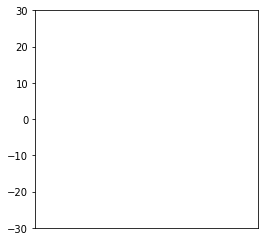

In [77]:

plt.figure(figsize=(4,4))
for i in range(len(eyfp)):
    plt.plot(eyfp[i]['smoothdFF'].mean())
    plt.xticks([])
    plt.ylim(-30,30)
# return eyfp.head(5)   
    

In [10]:
for file in eyfp:
    eyfp_ave = []
    eyfp_ave = np.append(pd.DataFrame(data=eyfp_files,index=eyfp[['# time']]))
    plt.plot(eyfp[i]['smoothdFF'].mean())
    plt.xticks([]) 
    

TypeError: list indices must be integers or slices, not list

In [ ]:

# slice from index 10 to index 2000 (approx 2000 seconds)

# Using a similar logic to my iterrows example above, I looped through df_events, created before and after time window limits and used these to filter df_stream grouped by a given time frequency. Then recalculated the index using time delta indexes to get a "distance from event" index. This was then appended to a list that was then combined using pd.concat with an axis of 1. Example below:
collect_list = []
for i in df_events[["DateTime"]].iterrows():
    date_time = i[1].values[0]
    before = date_time - pd.Timedelta(window)
    after = date_time + pd.Timedelta(window)

    df_stream_window = (
        df_stream.streamEventId.groupby(pd.Grouper(freq=freq))
        .count()
        .loc[before:after]
        .reset_index()
        .rename(columns={"streamEventId": "stream events"})
    )

    df_stream_window = df_stream_window.set_index(
        pd.to_timedelta((df_stream_window.DateTime - pd.to_datetime(date_time)))
        / np.timedelta64("1", "m")
    )

    collect_list.append(df_stream_window)

df_collect = pd.concat(collect_list, axis=1)

# This can then be used in plotting with estimator="mean" in Seaborn:
ax = sns.lineplot(data=df_collect, estimator="mean")
plt.axvline(0, color="lightcoral")
ax.set_xlabel("Time before / after event (min)")
ax.set_ylabel("# Stream Events")







## data generation - cumulative analysis over time
def get_data(max_val, max_time=1000):
    times = pd.DataFrame(np.random.uniform(0,max_time,size=50), columns=['# time'])
    vals = pd.DataFrame(np.random.randint(0,max_val,size=100), columns=['smoothdFF'])
    # note that we set time as index of the returned data
    df =  pd.concat([times, vals], axis = 1).dropna().set_index('# time').sort_index()
    df['cumulative'] = df.vals.cumsum()
    return df

df1,df2,df3 = (df for df in map(get_data, [10000, 13000, 4000]))
dfs = (df1, df2, df3)

# rename column for later plotting
for i,df in zip(range(3),dfs):
    df.rename(columns={'cumulative':f'cummulative_{i}'}, inplace=True)

# concatenate the dataframes with common time index
df_all = pd.concat(dfs,sort=False).sort_index()

# interpolate each cumulative column linearly
df_all.interpolate(inplace=True)

# plot graphs
mean_val = df_all.iloc[:,1:].mean(axis=1)
std_val = df_all.iloc[:,1:].std(axis=1)
min_val = mean_val - 2*std_val
max_val = mean_val + 2*std_val

fig, ax = plt.subplots(1,1,figsize=(16,9))
df_all.iloc[:,1:4].plot(ax=ax)

plt.plot(df_all.index, mean_val, c='purple')
plt.fill_between(df_all.index, min_val, max_val, color='blue', alpha=.2)
plt.show()
and we get: